---

# Load in Libraries


In [1]:
import pandas as pd
import re
import nltk
import numpy as np
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# from nltk.corpus import symbols
from string import punctuation
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report as clf_report

def BoM_verse_extract(file_path):
    speakers_with_verse = {}
    authors_with_verse = {}
    with open(file_path, "r", encoding="latin-1") as file:
        iterator = 0
        for line in file:
            iterator += 1
            line = line.replace("(", "( ")
            line = line.replace("\t", " ")
            line = line.replace("\n`", " ")
            line = line.replace("\xa0", " ")
            line = line.strip()
            line_split = line.split(" ")
            if line_split[0] == "(" or len(line_split) == 1:
                for i in range(len(line_split)):
                    if len(line_split) == 1:
                        name = line
                        break
                    elif line_split[i] == ")":
                        name = line_split[i + 1:]
                        name = " ".join(name).lower()
                        break
            elif  ":" in line:
                if name not in speakers_with_verse:
                        speakers_with_verse[name] = []
                if "THE BOOK OF" not in line:
                    speakers_with_verse[name].append((line, line))
            if line_split[0] == "(" or len(line_split) == 1:
                for i in range(len(line_split)):
                    if len(line_split) == 1:
                        name = line
                        name = name.lower()
                        if name == "":
                            print("")
                        break
                    elif line_split[i] == ")":
                        name = line_split[1]
                        name = name.lower()
                        if name == "":
                            print("")
                        break
            elif ":" in line:
                if name not in authors_with_verse:
                        authors_with_verse[name] = []
                if "THE BOOK OF" not in line:
                    authors_with_verse[name].append((line, line))
    divided_dicts = []
    divided_dicts.append(authors_with_verse)
    return divided_dicts
def BoM_verse_seperation(file_path, count):
    speakers_with_verse = {}
    authors_with_verse = {}
    with open(file_path, "r", encoding="latin-1") as file:
        iterator = 0
        for line in file:
            iterator += 1
            line = line.replace("(", "( ")
            line = line.replace("\t", " ")
            line = line.replace("\n`", " ")
            line = line.replace("\xa0", " ")
            line = line.strip()
            line_split = line.split(" ")
            if line_split[0] == "(" or len(line_split) == 1:
                for i in range(len(line_split)):
                    if len(line_split) == 1:
                        name = line
                        break
                    elif line_split[i] == ")":
                        name = line_split[i + 1:]
                        name = " ".join(name).lower()
                        break
            elif  ":" in line:
                if name not in speakers_with_verse:
                        speakers_with_verse[name] = []
                if "THE BOOK OF" not in line:
                    speakers_with_verse[name].append((line, line))
            if line_split[0] == "(" or len(line_split) == 1:
                for i in range(len(line_split)):
                    if len(line_split) == 1:
                        name = line
                        name = name.lower()
                        if name == "":
                            print("")
                        break
                    elif line_split[i] == ")":
                        name = line_split[1]
                        name = name.lower()
                        if name == "":
                            print("")
                        break
            elif ":" in line:
                if name not in authors_with_verse:
                        authors_with_verse[name] = []
                if "THE BOOK OF" not in line:
                    authors_with_verse[name].append((line, line))

    max_list_length = max(len(lst) for lst in authors_with_verse.values())
    num_divisions = count
    divided_dicts = [{} for _ in range(num_divisions)]
    for key, values_list in authors_with_verse.items():
        chunk_size = len(values_list) // num_divisions
        for i in range(num_divisions):
            start_idx = i * chunk_size
            end_idx = (i + 1) * chunk_size if i < num_divisions - 1 else len(values_list)
            divided_dicts[i][key] = values_list[start_idx:end_idx]

    return divided_dicts

def dc_verse_extract(file_path):
    dc_words = []
    with open(file_path, "r", encoding="latin-1") as file:
        for line in file:
            line = line.replace("(", "( ")
            line = line.replace("\t", " ")
            line = line.replace("\n`", " ")
            line = line.replace("\xa0", " ")
            line = line.strip()
            line_split = line.split(" ")
            for i in line_split:
                dc_words.append(i)
    return dc_words

In [2]:
def BoM_verse_extract(file_path):
    speakers_with_verse = {}
    authors_with_verse = {}
    # Open the file in read mode
    with open(file_path, "r", encoding="latin-1") as file:
        # Iterate over each line in the file
        iterator = 0
        for line in file:
            iterator += 1
            # Process each line as needed
            line = line.replace("(", "( ")
            line = line.replace("\t", " ")
            line = line.replace("\n`", " ")
            line = line.replace("\xa0", " ")
            line = line.strip()
            line_split = line.split(" ")
            if line_split[0] == "(" or len(line_split) == 1:
                for i in range(len(line_split)):
                    if len(line_split) == 1:
                        name = line
                        break
                    elif line_split[i] == ")":
                        name = line_split[i + 1:]
                        name = " ".join(name).lower()
                        break
            elif  ":" in line:
                if name not in speakers_with_verse:
                        speakers_with_verse[name] = []
                if "THE BOOK OF" not in line:
                    speakers_with_verse[name].append((line, line))
            if line_split[0] == "(" or len(line_split) == 1:
                for i in range(len(line_split)):
                    if len(line_split) == 1:
                        name = line
                        name = name.lower()
                        if name == "":
                            print("")
                        break
                    elif line_split[i] == ")":
                        name = line_split[1]
                        name = name.lower()
                        if name == "":
                            print("")
                        break
            elif ":" in line:
                if name not in authors_with_verse:
                        authors_with_verse[name] = []
                if "THE BOOK OF" not in line:
                    authors_with_verse[name].append((line, line))
    divided_dicts = []
    divided_dicts.append(authors_with_verse)
    return divided_dicts
def BoM_verse_seperation(file_path, count):
    speakers_with_verse = {}
    authors_with_verse = {}
    # Open the file in read mode
    with open(file_path, "r", encoding="latin-1") as file:
        # Iterate over each line in the file
        iterator = 0
        for line in file:
            iterator += 1
            # Process each line as needed
            line = line.replace("(", "( ")
            line = line.replace("\t", " ")
            line = line.replace("\n`", " ")
            line = line.replace("\xa0", " ")
            line = line.strip()
            line_split = line.split(" ")
            if line_split[0] == "(" or len(line_split) == 1:
                for i in range(len(line_split)):
                    if len(line_split) == 1:
                        name = line
                        break
                    elif line_split[i] == ")":
                        name = line_split[i + 1:]
                        name = " ".join(name).lower()
                        break
            elif  ":" in line:
                if name not in speakers_with_verse:
                        speakers_with_verse[name] = []
                if "THE BOOK OF" not in line:
                    speakers_with_verse[name].append((line, line))
            if line_split[0] == "(" or len(line_split) == 1:
                for i in range(len(line_split)):
                    if len(line_split) == 1:
                        name = line
                        name = name.lower()
                        if name == "":
                            print("")
                        break
                    elif line_split[i] == ")":
                        name = line_split[1]
                        name = name.lower()
                        if name == "":
                            print("")
                        break
            elif ":" in line:
                if name not in authors_with_verse:
                        authors_with_verse[name] = []
                if "THE BOOK OF" not in line:
                    authors_with_verse[name].append((line, line))

    max_list_length = max(len(lst) for lst in authors_with_verse.values())
    num_divisions = count  # Divide each list into 'count' parts

    # Initialize the list of dictionaries for divided entries
    divided_dicts = [{} for _ in range(num_divisions)]

    # Iterate over the original dictionary
    for key, values_list in authors_with_verse.items():
        # Calculate the chunk size for each list
        chunk_size = len(values_list) // num_divisions

        # Divide each list into chunks and assign to the corresponding dictionary
        for i in range(num_divisions):
            start_idx = i * chunk_size
            end_idx = (i + 1) * chunk_size if i < num_divisions - 1 else len(values_list)
            divided_dicts[i][key] = values_list[start_idx:end_idx]

    return divided_dicts

def dc_verse_extract(file_path):
    # Open the file in read mode
    dc_words = []
    with open(file_path, "r", encoding="latin-1") as file:
        # Iterate over each line in the file
        for line in file:
            # Process each line as needed
            line = line.replace("(", "( ")
            line = line.replace("\t", " ")
            line = line.replace("\n`", " ")
            line = line.replace("\xa0", " ")
            line = line.strip()
            line_split = line.split(" ")
            for i in line_split:
                dc_words.append(i)
    return dc_words


In [33]:
# dc_token = tokenize_list(dc_verse_extract("d&c_full.txt"))

# def word_count_dict_to_csv(word_freq_dict, csv_filename):
#     words = list(word_freq_dict.keys())
#     counts = list(word_freq_dict.values())
    
#     # Calculate the total word count
#     total_word_count = sum(counts)
    
#     # Add the total word count to the counts list
#     counts.append(total_word_count)
    
#     # Write the data to a CSV file
#     with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
#         csv_writer = csv.writer(csvfile)
        
#         # Write the header row with word names
#         csv_writer.writerow(words + ['Total_Word_Count'])
        
#         # Write the counts as a row
#         csv_writer.writerow(counts)

# word_count_dict_to_csv(dc_token, 'd&c_csv/d&c_complete.csv')


In [39]:
# count = 0
# stop_words = set(stopwords.words('english'))
# symbols = set(punctuation)


# speakers_word_freq = {}
# authors_word_freq = {}
# authors_function_word_freq = {}

In [3]:
function_words_king_james = [
    'the', 'and', 'of', 'to', 'in', 'that', 'which', 'he', 'unto', 'for', 
    'is', 'shall', 'not', 'it', 'be', 'his', 'with', 'they', 'him', 'as', 
    'all', 'thou', 'thy', 'was', 'from', 'they', 'them', 'their', 'have', 
    'will', 'are', 'or', 'your', 'our', 'we', 'ye', 'if', 'my', 'me', 
    'upon', 'were', 'by', 'do', 'but', 'what', 'an', 'there', 'then', 
    'also', 'into', 'when', 'had', 'hath', 'been', 'should', 'now', 
    'one', 'more', 'did', 'himself', 'her', 'out', 'some', 'these', 
    'other', 'said', 'no', 'therefore', 'like', 'how', 'man', 'who', 
    'yea', 'ye', 'such', 'didst', 'shalt', 'thyself', 'whom', 'may', 
    'again', 'than', 'every', 'must', 'without', 'where', 'himself', 
    'much', 'their', 'thine', 'those', 'let', 'would', 'say', 'wherefore', 
    'been', 'whosoever', 'could', 'make', 'being', 'whence', 'thus', 
    'shouldst', 'unto', 'were', 'wherein', 'therein', 'yet', 'till', 
    'among', 'according', 'unto', 'many', 'among', 'also', 'whither', 
    'because', 'whose', 'neither', 'whoso', 'whosoever', 'forth', 
    'moreover', 'forth', 'may', 'hereof', 'each', 'whereof', 'whosoever', 
    'once', 'ever', 'wherewith', 'ought', 'hence', 'forth', 'wherewithal', 
    'shouldest', 'hast', 'hast', 'seemeth', 'became', 'thereby', 'anything', 
    'whoso', 'wherewithal', 'whither', 'unto', 'throughout', 'lest', 'thee', 
    'whereto', 'wherewith', 'wheresoever', 'seest', 'seest', 'thy', 'wheresoever', 
    'oft', 'cometh', 'whosoever', 'because', 'doeth', 'whosoever', 'forth', 
    'becometh', 'soever', 'oftentimes', 'wherefore', 'notwithstanding', 
    'shouldest', 'verily', 'whereto', 'wherewithal', 'hast', 
    'underneath', 'upwards', 'whatsoever', 'wherewith', 'notwithstanding', 
    'whensoever', 'whither', 'because', 'upwards', 'hast', 'doeth', 
    'whither', 'seest', 'abundance', 'doeth', 'whosoever', 'upwards', 'whence', 
    'whereunto', 'thereunto', 'henceforth', 'forthwith', 'throughout', 
    'seest', 'whereto', 'thereof', 'whatsoever', 'wherefore', 'becometh', 
    'whither', 'forthwith', 'wherewith', 'whatsoever', 'whosoever', 'whosoever', 
    'whereby', 'upward', 'therein', 'thee', 'whosoever', 'because', 'howsoever', 
    'forthwith', 'thine', 'whereon', 'wherein', 'whoso', 'whereto', 'wherewithal', 
    'downward', 'wherewith', 'outward', 'notwithstanding', 
    'thereunto', 'thence', 'thine', 'wherewith', 'whosoever', 'thereon', 
    'whatsoever', 'notwithstanding', 'wherewithal', 'forthwith', 'notwithstanding', 
    'doeth', 'upward', 'thereof', 'becometh', 'soever', 'therefrom', 'whosoever', 
    'whoso', 'inasmuch', 'whereon', 'whosoever', 'whereby', 'therewith', 'outward', 
    'forthwith', 'whither', 'seest', 'soever', 'whereto', 'thine', 'doeth', 
    'abundance', 'doeth', 'whereby', 'forthwith', 'seest', 'whereto', 
    'thereupon', 'whereunto', 'thereupon', 'forthwith', 'wherewithal', 
    'whatsoever', 'soever', 'soever', 'wherefore', 'forthwith', 'therein', 'henceforth', 
    'abundance', 'seest', 'wherewithal', 'upward', 'wherein', 
    'wherewithal', 'god', 'lord' ]

def filter_function_words(tokenized_string, function_words_list):
    filtered_tokens = [token for token in tokenized_string if token in function_words_list]
    return filtered_tokens

In [30]:
# for author, verses in speakers_with_verse.items():
#     # Combine all verses into a single string for the author
#         author_text = " ".join(verse[1] for verse in verses)
        
#         # Tokenize the text
#         tokens = word_tokenize(author_text)
        
#         # Lowercase all tokens for case-insensitive analysis
#         tokens = [token.lower() for token in tokens if token.lower() not in symbols]
        
#         # Filter out stop words and symbols
#         tokens = [token for token in tokens if token not in stop_words]
        
#         # Count the frequency of each word
#         word_freq = Counter(tokens)

#         word_freq = dict(word_freq)
        
#         # Store word frequencies for the author
#         speakers_word_freq[author] = word_freq

In [31]:
# for author, verses in authors_with_verse.items():
#     # Combine all verses into a single string for the author
#         author_text = " ".join(verse[1] for verse in verses)
        
#         # Tokenize the text
#         tokens = word_tokenize(author_text)
        
#         # Lowercase all tokens for case-insensitive analysis
#         tokens = [token.lower() for token in tokens if token.lower() not in symbols]
        
#         # # Filter out stop words and symbols
#         tokens = [token for token in tokens if token not in stop_words]
        
#         # Count the frequency of each word
#         word_freq = Counter(tokens)

#         word_freq = dict(word_freq)
        
#         # Store word frequencies for the author
#         authors_word_freq[author] = word_freq

In [4]:
def tokenize_dict(text_list):
    tokenized_text_list = []
    authors_function_word_freq = {}
    for i in text_list:      
        authors_function_word_freq = {}
        for author, verses in i.items():

            # Combine all verses into a single string for the author
                verse_lengths = []
                verse_count = 0
                for verse in verses:
                     verse_count += 1
                     verse_split = verse[1].split(" ")
                     verse_lengths.append(len(verse_split))
                author_text = " ".join(verse[1] for verse in verses)
                
                # Tokenize the text
                tokens = word_tokenize(author_text)
                
                # Lowercase all tokens for case-insensitive analysis
                tokens = [token.lower() for token in tokens if token.lower() not in symbols]
                
                filtered_tokens = filter_function_words(tokens, function_words_king_james)
                

                letter_freq = {}
                # Count the frequency of each word
                word_freq = Counter(filtered_tokens)
                word_freq['Total_Word_Count'] = len(tokens)
                letter_total = 0
                for token in tokens:
                     letter_total += len(token)
                     for letter in token:
                          if str.isalpha(letter) is not True:
                               break
                          if letter_freq.get(letter) is None:
                               letter_freq[letter] = 1
                          else:
                               letter_freq[letter] += 1
                if len(tokens) != 0:
                    word_freq['AVG_Letter_Per_Word'] = letter_total / len(tokens)
                    word_freq['AVG_Word_Per_Verse'] = sum(verse_lengths) / verse_count
                    for letter, letter_count in letter_freq.items():
                        word_freq[f"{letter}_percentage_use"] = letter_count / letter_total
                else:
                    word_freq['AVG_Letter_Per_Word'] = 0
                    word_freq['AVG_Word_Per_Verse'] = 0
                    for letter, letter_count in letter_freq.items():
                        word_freq[f"{letter}_percentage_use"] = 0
                     
                     

                word_freq = dict(word_freq)
                
                # Store word frequencies for the author
                authors_function_word_freq[author] = word_freq
        tokenized_text_list.append(authors_function_word_freq)
    return tokenized_text_list

def tokenize_list(word_list):

    author_text = " ".join(word for word in word_list)

    tokens = word_tokenize(author_text)
    
    # Lowercase all tokens for case-insensitive analysis
    tokens = [token.lower() for token in tokens if token.lower() not in symbols]

    
    # Count the frequency of each word
    word_freq = Counter(tokens)
    word_freq['Total_Word_Count'] = len(tokens)


    return dict(word_freq)
#tokenized_text_list = tokenize_dict(BoM_verse_seperation("BoM.txt", 10))

In [5]:
def split_author_dict(dict_full, split_count):
    data = dict_full
    split_data = {f"{author}_{i}": {} for author in data for i in range(1,split_count + 1)}


    # Initialize lists to track the words for each section
    section_words = {}
    word_list = []
    # Iterate over each author
    for author, words_dict in data.items():
        for word, count in words_dict.items():
            if word not in word_list:
                word_list.append(word)
            mod_count = -1
            for split_author, split_words_dict in split_data.items():
                
                if author in split_author:
                    if mod_count == -1:
                        mod_count = count % split_count
                    
                    new_count = count // split_count
                    if mod_count > 0:
                        new_count += 1
                        mod_count -= 1
                    else:
                        pass
                    split_data[split_author][word] = new_count

    return(split_data, data)


In [29]:
# for author, word_freq in speakers_word_freq.items():
#     print(f"\nWord frequencies for {author}:")
#     for word, freq in word_freq.most_common(5):
#         print(f"{word}: {freq}")

In [28]:
# for author, word_freq in authors_word_freq.items():
#     print(f"\nWord frequencies for {author}:")
#     for word, freq in word_freq.most_common(5):
#         print(f"{word}: {freq}")

In [27]:
authors_word_variance = {}
speakers_word_variance = {}

In [26]:
# # Iterate over each author's word frequencies
# for author, word_freq in speakers_word_freq.items():
#     # Extract word frequencies
#     word_frequencies = np.array(list(word_freq.values()))
    
#     # Calculate variance of word frequencies
#     variance = np.var(word_frequencies)
    
#     # Store word variance for the author
#     speakers_word_variance[author] = variance

In [25]:
# # Iterate over each author's word frequencies
# for author, word_freq in authors_word_freq.items():
#     # Extract word frequencies
#     word_frequencies = np.array(list(word_freq.values()))
    
#     # Calculate variance of word frequencies
#     variance = np.var(word_frequencies)
    
#     # Store word variance for the author
#     authors_word_variance[author] = variance

In [24]:
# total = 0
# average_count = 0
# for key, value in speakers_word_freq.items():
#      average_count += 1
#      total += len(value)
# average = total / average_count
# print(average)
# note_worthy_speakers = []
# for key, value in speakers_word_freq.items():
#      note_worthy_speakers.append(key) if len(value) > 250 else None
# for author, variance in authors_word_variance.items():
#     if author in note_worthy_speakers:
#         speakers_word_freq[author]
#         print(f"Word variance for {author}: {variance}, word count: {len(speakers_word_freq[author])} ")

In [23]:
# for author, variance in authors_word_variance.items():
#         print(f"Word variance for {author}: {variance}, word count: {len(authors_word_freq[author])} ")

In [22]:
import csv
def author_dict_to_csv(data, filename, word_list, defaultdict):
    # Prepare data for transposing
    all_words = word_list
    author_data = defaultdict(dict)
    for author_section, word_counts in data.items():
        author = author_section.split('_')[0]
        for word, count in word_counts.items():
            all_words.add(word)
            author_data[author][word] = count

    # Transpose data for writing to CSV
    rows = [{'Author': 'Author'}]
    rows[0].update({word: word for word in all_words})
    for author, word_counts in author_data.items():
        row = {'Author': author}
        row.update({word: word_counts.get(word, 0) for word in all_words})
        rows.append(row)

    # Write data to CSV file
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Author'] + list(all_words)
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)

def passage_dict_to_csv(data, filename):
    # Flatten the dictionary into a list of dictionaries
    rows = []
    for word, word_counts in data.items():
            if any(letter.isalpha() for letter in word):
                rows.append({'Word': word, 'Count': word_counts})

    # Write data to CSV file
    with open(filename, 'w', newline='', encoding='latin-1') as csvfile:
        fieldnames = ['Word', 'Count']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)

def named_author_dict_to_csv(author, data, filename):
    # Flatten the dictionary into a list of dictionaries
    rows = []
    for word, word_counts in data.items():
            if any(letter.isalpha() for letter in word):
                rows.append({'Author' : author, 'Word': word, 'Count': word_counts})

    # Write data to CSV file
    with open(filename, 'w', newline='', encoding='latin-1') as csvfile:
        fieldnames = ['Author', 'Word', 'Count']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)


# author_dict_to_csv(authors_function_word_freq, "authors_only_function.csv")

In [21]:
import csv
import os
from collections import defaultdict
def create_section_csv(split_author_dict, count, iterator):
    # Create the 'authors_csv' folder if it doesn't exist
    print("making authors_csv")
    if not os.path.exists('authors_csv'):
        os.makedirs('authors_csv')
    split_data = split_author_dict
    section_dictionary = {}
    for author, word_counts in split_data.items():
        if count == 1:
            filename = f"authors_csv/author_section_complete.csv"
        else:
            filename = f"authors_csv/author_section_{iterator}.csv"
        section_dictionary[author] = word_counts
    create_authors_csv_with_counts(section_dictionary, filename)

    section_dictionary = {}


In [20]:
#author_dict_to_csv(authors_word_freq, "authors.csv")

In [1]:
def remove_rows_without_letters(input_csv, output_csv):
    with open(input_csv, 'r', newline='', encoding='latin-1') as infile, \
            open(output_csv, 'w', newline='', encoding='latin-1') as outfile:
        reader = csv.DictReader(infile)
        fieldnames = reader.fieldnames
        writer = csv.DictWriter(outfile, fieldnames=fieldnames)
        writer.writeheader()

        for row in reader:
            word = row['Word']
            if any(letter.isalpha() for letter in word):
                writer.writerow(row)

In [18]:
import pandas as pd
def encode_csv(file):
    df = pd.read_csv(file)

    one_hot_encoded = pd.get_dummies(df['Word'])

    df_encoded = pd.concat([df, one_hot_encoded], axis=1)

    df_encoded.drop('Word', axis=1, inplace=True)

    df_encoded.to_csv(f"encoded_{file}", index=False)

In [17]:
def tokenize_text(text):
    tokens = word_tokenize(text)
        
    tokens = [token.lower() for token in tokens if token.lower() not in symbols]
    
    return tokens

In [16]:
import shutil
def create_func_dict(file_path):
    string = ""
    with open(file_path, "r", encoding="latin-1") as file:

        for line in file:
            if "Chapter" not in line:

                line = line.replace("(", "( ")
                line = line.replace("\t", " ")
                line = line.replace("\n`", " ")
                line = line.replace("\xa0", " ")
                line = line.strip()
                #line_split = line.split(" ")
                string = string + line

    text_tokenized = tokenize_text(string)

    text_tokenized = filter_function_words(text_tokenized, function_words_king_james)

    text_freq = Counter(text_tokenized)

    text_freq = dict(text_freq)
    filename = file_path.split(".")
    passage_dict_to_csv(text_freq, f"{filename[0]}_func.csv")
    return f"{filename[0]}_func.csv"

def create_grouped_func_dict(file_path, word_max):
    string = ""
    with open(file_path, "r", encoding="latin-1") as file:

        word_count = []
        word_grouping = []
        for line in file:
            if "Chapter" not in line:
                
                line = line.replace("(", "( ")
                line = line.replace("\t", " ")
                line = line.replace("\n`", " ")
                line = line.replace("\xa0", " ")
                line = line.strip()
                line_split = line.split(" ")
                for i in line_split:
                    word_count.append(i)
                string = string + line 
                if len(word_count) >= word_max:
                    word_grouping.append(string)
                    string = ''
                    word_count = []
        word_grouping[len(word_grouping)-1] = word_grouping[len(word_grouping)-1] + string
    word_groups_labeled = {}
    iterator = 0
    print(len(word_grouping))
    for i in word_grouping:
        iterator += 1
        text_tokenized = tokenize_text(i)

        text_tokenized = filter_function_words(text_tokenized, function_words_king_james)

        text_freq = Counter(text_tokenized)

        text_freq = dict(text_freq)

        word_groups_labeled[f"_group_{iterator}"] = text_freq

        filename = file_path.split(".")

        folder_name = f"{filename[0]}_folder"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        else:
            shutil.rmtree(folder_name)
            os.makedirs(folder_name) 
        # new_file_path = os.path.join(folder_name, f"{filename[0]}_func.csv")
        for key, value in word_groups_labeled.items():
            new_file_path = os.path.join(folder_name, f"{filename[0]}{key}_func.csv")
            passage_dict_to_csv(value, new_file_path)
def create_named_grouped_func_dict(file_path, author_dict, word_max=0,):
    if word_max != 0:
        string = ""
        with open(file_path, "r", encoding="latin-1") as file:
            
            word_count = []
            word_list=[]
            word_grouping = []
            for line in file:
                if "Chapter" not in line:
                    
                    line = line.replace("(", "( ")
                    line = line.replace("\t", " ")
                    line = line.replace("\n`", " ")
                    line = line.replace("\xa0", " ")
                    line = line.strip()
                    line_split = line.split(" ")
                    for i in line_split:
                        if i not in word_list:
                            word_list.append(i)
                        word_count.append(i)
                    string = string + line 
                    if len(word_count) >= word_max:
                        word_grouping.append(string)
                        string = ''
                        word_count = []
            word_grouping[len(word_grouping)-1] = word_grouping[len(word_grouping)-1] + string
            word_groups_labeled = {}
            iterator = 0
            for i in word_grouping:
                iterator += 1
                text_tokenized = tokenize_text(i)

                text_tokenized = filter_function_words(text_tokenized, function_words_king_james)

                text_freq = Counter(text_tokenized)

                text_freq = dict(text_freq)

                word_groups_labeled[f"Group_{iterator}"] = text_freq

                filename = file_path.split(".")

                name_list = author_dict[filename[0]]
                name = name_list[0]

                folder_name = f"{name}_folder"
                if not os.path.exists(folder_name):
                    os.makedirs(folder_name)
                #else:
                    #shutil.rmtree(folder_name)
                    #os.makedirs(folder_name) 
                #new_file_path = os.path.join(folder_name, f"{filename[0]}_func.csv")
                iterator = 0
                for key, value in word_groups_labeled.items():
                    iterator += 1
                    new_file_path = os.path.join(folder_name, f"{name}_group_{iterator}_name_include_func.csv")
                    named_author_dict_to_csv(name, value, new_file_path)
            #return f"{filename[0]}_func.csv"
    else:
        string = ""
        with open(file_path, "r", encoding="latin-1") as file:
            
            word_count = []
            word_list = []
            for line in file:
                if "Chapter" not in line:
                    
                    line = line.replace("(", "( ")
                    line = line.replace("\t", " ")
                    line = line.replace("\n`", " ")
                    line = line.replace("\xa0", " ")
                    line = line.strip()
                    line_split = line.split(" ")
                    for i in line_split:
                        if i not in word_list:
                            word_list.append(i)
                    string = string + line 
            text_tokenized = tokenize_text(string)

            text_tokenized = filter_function_words(text_tokenized, function_words_king_james)

            text_freq = Counter(text_tokenized)

            text_freq = dict(text_freq)

            filename = file_path.split(".")
            name_list = author_dict[filename[0]]
            name = name_list[0]
            folder_name = f"{name}_folder"
            if not os.path.exists(folder_name):
                os.makedirs(folder_name)
            new_file_path = os.path.join(folder_name, f"{name}_name_include_func.csv")
            named_author_dict_to_csv(name, text_freq, new_file_path,)
            #return f"{filename[0]}_func.csv"

In [15]:
def create_txt_dict(file_path):
    string = ""
    # file = "nephi_chapter_2.txt"
    with open(file_path, "r", encoding="latin-1") as file:

        for line in file:
            if "Chapter" not in line:
                line = line.replace("(", "( ")
                line = line.replace("\t", " ")
                line = line.replace("\n`", " ")
                line = line.replace("\xa0", " ")
                line = line.strip()
                #line_split = line.split(" ")
                string = string + line

    text_tokenized = tokenize_text(string)

    text_freq = Counter(text_tokenized)

    text_freq = dict(text_freq)
    filename = file_path.split(".")
    passage_dict_to_csv(text_freq, f"{filename[0]}.csv")
    return f"{filename[0]}.csv"

#encode_csv("nephi_1_te.csv")


In [14]:
import pandas as pd
def create_author_func_aggr_csv(file_path, filename):
    df = pd.read_csv(file_path)


    for word in df.columns[1:]:
        if '_' not in word:
            df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
            df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
    df["Function_Word_Use"] = df['Total_Function_Word_Count'] / df['Total_Word_Count']
    filtered_columns = sorted([col for col in df.columns if 'FC' in col or 'WC' in col])
    letter_columns = sorted([col for col in df.columns if 'percentage' in col])
    print(letter_columns)
    df = df[['Author'] + filtered_columns + letter_columns + ["Function_Word_Use", 'Total_Word_Count', 'Total_Function_Word_Count', "AVG_Letter_Per_Word", "AVG_Word_Per_Verse"]]
    #df = df[['Author'] + [f'{col}_WC' for col in sorted_columns] + [f'{col}_FC' for col in sorted_columns] + ['Total_Word_Count', 'Total_Function_Word_Count']]
    df.to_csv(filename, index=False)

def remove_non_ascii(text):
    return ''.join(char for char in text if ord(char) < 128)

def create_authors_csv_with_counts(data, filename):
    rows = []
    print(f"creating csv for {filename}")
    for author, word_counts in data.items():
        author = author.split("_")[0]
        author = remove_non_ascii(author)
        if author != "":
            row = {'Author': author}
            row.update(word_counts)
            rows.append(row)
    df = pd.DataFrame(rows)
    if "complete" not in filename:
        original_df = pd.read_csv("authors_csv/author_section_complete.csv")
        unique_words = original_df.columns.tolist()[1:-1]  # Extract unique words from the original CSV

        missing_columns = set(unique_words) - set(df.columns)
        for column in missing_columns:
            df[column] = 0

    df.fillna(0, inplace=True)
    words_to_remove = ['seem', 'seest', 'soever', 'wherewithal', 'whereon', 'wheresoever']

    columns_to_keep = [col for col in df.columns if not any(word in col for word in words_to_remove)]


    df = df[columns_to_keep]
    print("percentage column saving")
    percentage_cols = [col for col in df.columns if 'percentage' in col]
    non_percentage_cols = [col for col in df.columns if 'percentage' not in col]
    df = df[non_percentage_cols + percentage_cols]
    print("total word count column saving")
    df = df[[col for col in df.columns if col != 'Total_Word_Count'] + ['Total_Word_Count']]
    print("AVG letter column saving")
    df = df[[col for col in df.columns if col != 'AVG_Letter_Per_Word'] + ['AVG_Letter_Per_Word']]
    print("AVG word column saving")
    df = df[[col for col in df.columns if col != 'AVG_Word_Per_Verse'] + ['AVG_Word_Per_Verse']]
    print("AVG verse column saving")

    df['Total_Function_Word_Count'] = df.iloc[:, 1:-3].sum(axis=1)

    print("AVG total_function column saving")

    df = df[[col for col in df.columns if col != 'Total_Function_Word_Count'] + ['Total_Function_Word_Count']]

    # df = (df[[col for col in df.columns if col != 'Total_Word_Count'] + ['Total_Word_Count']]
    #   .assign(Total_Function_Word_Count=df.iloc[:, 1:-1].sum(axis=1))
    #   .rename(columns={'Total_Function_Word_Count': 'Total_Function_Word_Count'})
    #   .assign(AVG_Letter_Per_Word=lambda x: x['AVG_Letter_Per_Word'])
    #   .assign(AVG_Word_Per_Verse=lambda x: x['AVG_Word_Per_Verse']))

    print("output to csv")
    df.to_csv(filename, index=False)

# print("Output CSV file generated successfully.")

In [40]:
import shutil
stop_words = set(stopwords.words('english'))
symbols = set(punctuation)
def create_training_data(count, text):
    folder_path = "authors_csv"
    shutil.rmtree(folder_path)
    tokenized_complete_text = tokenize_dict(BoM_verse_extract(text))
    tokenized_text_list = tokenize_dict(BoM_verse_seperation(text, count))
    iterator = 0
    print("starting to tokenize complete text")
    create_section_csv(tokenized_complete_text[0], 1, 1)
    for i in tokenized_text_list:
        iterator += 1
        print("starting to tokenize individual text")
        create_section_csv(i, count, iterator)
    for filename in os.listdir(folder_path):
            new_file_path = f"{filename.split(".")[0]}_aggr.csv"
            filename = os.path.join(folder_path, filename)
            new_file_path = os.path.join(folder_path, new_file_path)
            create_author_func_aggr_csv(filename, new_file_path)
create_training_data(100, "texts/BoM.txt")













































































































































































































































































































starting to tokenize complete text
making authors_csv
creating csv for authors_csv/author_section_complete.csv
percentage column saving
total word count column saving
AVG letter column saving
AVG word column saving
AVG verse column saving
AVG total_function column saving
output to csv
starting to tokenize individual text
making authors_csv
creating csv for authors_csv/author_section_1.csv
percentage column saving
total word count column saving
AVG letter column saving
AVG word column saving
AVG verse column saving
AVG total_function column saving
output to csv
starting to tokenize individual text
making authors_csv
creating csv for authors_csv/author_section_2.csv
percentage column saving
to

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']
['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use'

C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

['a_percentage_use', 'b_percentage_use', 'c_percentage_use', 'd_percentage_use', 'e_percentage_use', 'f_percentage_use', 'g_percentage_use', 'h_percentage_use', 'i_percentage_use', 'j_percentage_use', 'k_percentage_use', 'l_percentage_use', 'm_percentage_use', 'n_percentage_use', 'o_percentage_use', 'p_percentage_use', 'q_percentage_use', 'r_percentage_use', 's_percentage_use', 't_percentage_use', 'u_percentage_use', 'v_percentage_use', 'w_percentage_use', 'x_percentage_use', 'y_percentage_use', 'z_percentage_use', 'â_percentage_use']


C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_WC'] = (df[word] / df['Total_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{word}_FC'] = (df[word] / df['Total_Function_Word_Count']) * 100
C:\Users\josep\AppData\Local\Temp\ipykernel_13712\2803893641.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

In [36]:
import pandas as pd
def create_aggr_func_csv(file_path):
    original_df = pd.read_csv("authors_csv/author_section_complete_aggr.csv")
    unique_words = original_df.columns.tolist()[1:-1]  

    new_df = pd.read_csv(file_path)

    df_pivot = new_df.pivot_table(index=None, columns='Word', values='Count', aggfunc='sum', fill_value=0)

    missing_columns = set(unique_words) - set(df_pivot.columns)
    for column in missing_columns:
        df_pivot[column] = 0  

    df_pivot.reset_index(inplace=True)

    df_pivot = df_pivot[sorted(df_pivot.columns)]

    total_word_count = df_pivot.sum(axis=1)

    for word in unique_words:
        df_pivot[word] = (df_pivot[word] / total_word_count) * 100

    df_pivot['Total_Word_Count'] = total_word_count

    filename = file_path.split(".")
    df_pivot.to_csv(f"{filename[0]}_aggr.csv", index=False)

def create_named_aggr_func_csv(file_path, author_name):
    original_df = pd.read_csv("authors_aggregated_with_percentage.csv")
    unique_words = original_df.columns.tolist()[1:-1]  

    new_df = pd.read_csv(file_path)

    new_df['Author'] = author_name

    df_pivot = new_df.pivot_table(index='Author', columns='Word', values='Count', aggfunc='sum', fill_value=0)

    missing_columns = set(unique_words) - set(df_pivot.columns)
    for column in missing_columns:
        df_pivot[column] = 0

    df_pivot.reset_index(inplace=True)

    df_pivot = df_pivot[['Author'] + sorted(unique_words)]

    total_word_count = df_pivot[unique_words].sum(axis=1)

    for word in unique_words:
        df_pivot[word] = (df_pivot[word] / total_word_count) * 100

    df_pivot['Total_Word_Count'] = total_word_count

    filename_parts = file_path.split(".")
    output_filename = f"{filename_parts[0]}_aggr.csv"
    df_pivot.to_csv(output_filename, index=False)

In [37]:
def create_dc_csv_with_counts(data, filename):
    rows = []
    for author, word_counts in data.items():
        author = author.split("_")[0]
        author = remove_non_ascii(author)
        if author != "":
            row = {'Author': author}
            row.update(word_counts)
            rows.append(row)
    df = pd.DataFrame(rows)
    if "complete" not in filename:
        original_df = pd.read_csv("authors_csv/author_section_complete.csv")
        unique_words = original_df.columns.tolist()[1:-1]  
        missing_columns = set(unique_words) - set(df.columns)
        for column in missing_columns:
            df[column] = 0

    df.fillna(0, inplace=True)
    words_to_remove = ['seem', 'seest', 'soever', 'wherewithal', 'whereon', 'wheresoever']

    columns_to_keep = [col for col in df.columns if not any(word in col for word in words_to_remove)]

    df = df[columns_to_keep]
    df = df[[col for col in df.columns if col != 'Total_Word_Count'] + ['Total_Word_Count']+ ["AVG_Letter_Per_Word"] +["AVG_Word_Per_Verse"]]

    df['Total_Function_Word_Count'] = df.iloc[:, 1:-1].sum(axis=1)

    df = df[[col for col in df.columns if col != 'Total_Function_Word_Count'] + ['Total_Function_Word_Count']+ ["AVG_Letter_Per_Word"] +["AVG_Word_Per_Verse"]]

    df.to_csv(filename, index=False)


folder_path = "d&c_csv"
tokenized_complete_text = tokenize_dict(BoM_verse_extract("texts/d&c_full.txt"))
iterator = 0
create_section_csv(tokenized_complete_text[0], 1, 1)
# 
#author_func_aggr_csv(filename, new_file_path)

NameError: name 'symbols' is not defined

In [ ]:

# # Step 1: Data Preprocessing
# data = pd.read_csv("authors_aggregated_with_percentage.csv", encoding='latin-1')

# # Splitting data into features and target variable
# X_train = data.drop(columns=["Author", "Total_Word_Count"])
# X_train.reset_index(drop=True, inplace=True)
# y_train = data["Author"]

# hyperparameters2 = {
#     'n_estimators': 100,
#     'max_depth': None,
#     # Add more hyperparameters as needed
# }

# model = RandomForestClassifier(**hyperparameters2)
# model.fit(X_train, y_train)

# cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# # Print cross-validation scores
# print("Cross-validation scores:", cv_scores)
# print("Mean CV score:", np.mean(cv_scores))
# print("Standard deviation of CV scores:", np.std(cv_scores))

# # Once the model is trained and evaluated, you can use it to predict the author of a passage
# # Extract function words from the passage and compute their frequencies
# # Pass the computed frequencies into the trained model to predict the author
# predicted_author = model.predict(new_passage_function_word_frequencies)
# print("Predicted author:", predicted_author)

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [42]:
def run_predict_group(folder_path, model):
    files = []
    guesses = {}
    for filename in os.listdir(folder_path):
        if "aggr" in filename and "name" not in filename:
            files.append(filename)
    print(files)
    for i in files:
        new_file_path = os.path.join(folder_path, i)
        new_data = pd.read_csv(new_file_path)
        new_data = new_data.drop(columns=["Total_Word_Count"])
        prediction = model.predict(new_data)
        feature_importance = model.feature_importances_
        feature_importance_dict = dict(zip(new_data.columns, feature_importance))
        sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))
        guesses[i] = prediction    
    return guesses, sorted_feature_importance, len(files)


In [43]:
import pandas as pd
import numpy as np
import os

# Define function to load training data from individual files
def load_training_data(folder_path, count, authors_to_include=[]):
    numbers_list = [num for num in range(1, count+1)]
    data_list = []
    filename_list = []
    iterator = 0
    for filename in os.listdir(folder_path):
        # Check if the filename contains "aggr"
            if "aggr" in filename and "complete" not in filename:
                num = filename.split("_")[2]
                if int(num) in numbers_list:
                    if iterator < count:
                        iterator += 1
                        file_path = os.path.join(folder_path, filename)
                        df = pd.read_csv(file_path, encoding='latin-1')
                        if authors_to_include:
                            df = df[df["Author"].isin(authors_to_include)]
                        # Replace NaN values with 0.0
                        df.fillna(0.0, inplace=True)
                        if df.isnull().values.any():
                            print(f"NaN values found in DataFrame: {filename}")
                            print(df[df.isnull().any(axis=1)])
                        data_list.append(df)
                        filename_list.append(filename)
    return pd.concat(data_list, ignore_index=True)

# Define function to load testing data from a single file
def load_testing_data(folder_path, count, count_adder, authors_to_include=[]):
    numbers_list = [num for num in range(count_adder+1, count_adder+count+1)]
    data_list = []
    filename_list = []
    iterator = 0
    count_iterator = 1
    for filename in os.listdir(folder_path):
        # Check if the filename contains "aggr"
            num = filename.split("_")[2]
            if "aggr" in filename and "complete" not in filename and int(num) in numbers_list:
                count_iterator += 1
                if iterator < count:
                    iterator += 1
                    file_path = os.path.join(folder_path, filename)
                    df = pd.read_csv(file_path, encoding='latin-1')
                    # Replace NaN values with 0.0
                    if authors_to_include:
                        df = df[df["Author"].isin(authors_to_include)]
                    df.fillna(0.0, inplace=True)
                    data_list.append(df)
                    filename_list.append(filename)
    return pd.concat(data_list, ignore_index=True)

def create_complete_data(folder_path, authors_to_include=[]):
    combined_df = pd.DataFrame()
    for filename in os.listdir(folder_path):
        if "aggr" in filename and "complete" not in filename:
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path, encoding='latin-1')

            if authors_to_include:
                df = df[df["Author"].isin(authors_to_include)]

            df.fillna(0.0, inplace=True)

            if df.isnull().values.any():
                print(f"NaN values found in DataFrame: {filename}")
                print(df[df.isnull().any(axis=1)])

            combined_df = pd.concat([combined_df, df], ignore_index=True)

    return combined_df

In [ ]:
create_training_data(50)













































































































































































































































































































making authors_csv
count 1
count 1
count 1
count 1
count 1
count 1
count 1
count 1
count 1
count 1
count 1
count 1


KeyError: "['AVG_Verse_Length'] not in index"

In [44]:
test_folder_path = "authors_csv"
desired_authors = ["nephi", "jacob", "moroni", "mormon", "enos"]
df = create_complete_data(test_folder_path, authors_to_include=desired_authors)

print(df)

     Author  abundance_FC  abundance_WC  according_FC  according_WC  again_FC  \
0    moroni           0.0           0.0      0.484283      0.277200  1.089636   
1    mormon           0.0           0.0      0.332547      0.186121  0.712601   
2     nephi           0.0           0.0      0.221124      0.117751  0.110562   
3      enos           0.0           0.0      0.921704      0.490998  0.153617   
4     jacob           0.0           0.0      0.660822      0.383387  0.330411   
..      ...           ...           ...           ...           ...       ...   
495  moroni           0.0           0.0      0.000000      0.000000  0.000000   
496  mormon           0.0           0.0      0.097755      0.054259  0.293265   
497   nephi           0.0           0.0      0.000000      0.000000  0.000000   
498    enos           0.0           0.0      0.000000      0.000000  0.000000   
499   jacob           0.0           0.0      0.000000      0.000000  0.000000   

     again_WC    all_FC    

In [46]:
from sklearn.utils import shuffle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

author_folder_path = "authors_csv"
desired_authors = ["nephi", "jacob", "moroni", "mormon", "enos"]
df = create_complete_data(author_folder_path, authors_to_include=desired_authors)
target = df["Author"]
features = df.drop(columns=["Author"])
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train = shuffle(X_train)

In [47]:

# hyperparameters = {
#     'max_depth': None,
#     'random_state': 42
#     # Add more hyperparameters as needed
# }
# hyperparameters = {
#     'n_estimators': 150,
#     'max_depth': None,
#     'min_samples_split': 15,
#     'min_samples_leaf': 2,
#     'bootstrap': True,
#     'random_state': 42
# }

hyperparameters = {'bootstrap': True, 
                    'max_depth': 15, 
                    'min_samples_leaf': 2, 
                    'min_samples_split': 10, 
                    'n_estimators': 500}

# Initialize the Random Forest Classifier with the hyperparameters
rf_model = RandomForestClassifier(**hyperparameters)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification


train_folder_path = "authors_csv"
desired_authors = ["nephi", "jacob", "moroni", "mormon", "enos"]
# Load the training data
X_train = load_training_data("authors_csv", 90, desired_authors)
#X_train.fillna(0.0, inplace=True)
#print(X_train)
X_train = shuffle(X_train)
# Splitting data into features and target variable
y_train = X_train["Author"]
X_train = X_train.drop(columns=["Author", "Total_Word_Count", 'Total_Function_Word_Count'])

knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

test_folder_path = "authors_csv"
desired_authors = ["nephi", "jacob", "moroni", "mormon", "enos"]
X_test = load_testing_data(test_folder_path, 4, 45, desired_authors)
#X_test.fillna(0.0, inplace=True)
X_test = shuffle(X_test)
# Step 2: Preprocess testing data (drop columns not used in training)
X_test_processed = X_test.drop(columns=["Author", "Total_Word_Count", "Total_Function_Word_Count"])

# Step 3: Make predictions using the trained model
predictions = knn.predict(X_test_processed)
#y_true = X_test["Author"]
# Optional: Print the predictions
#print(predictions)
y_true = X_test["Author"]
#print(y_true)
print(predictions)
accuracy = accuracy_score(y_true, predictions)
precision = precision_score(y_true, predictions, average='weighted')  # Other options: 'micro', 'macro'
recall = recall_score(y_true, predictions, average='weighted')  # Other options: 'micro', 'macro'
f1 = f1_score(y_true, predictions, average='weighted')  # Other options: 'micro', 'macro'

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


['nephi' 'nephi' 'mormon' 'mormon' 'moroni' 'mormon' 'mormon' 'enos'
 'enos' 'enos' 'mormon' 'mormon' 'mormon' 'mormon' 'nephi' 'moroni'
 'moroni' 'mormon' 'enos' 'moroni']
Accuracy: 0.65
Precision: 0.5722222222222222
Recall: 0.65
F1-Score: 0.5873626373626374


c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^

In [48]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=50)

print("Cross-validation scores:", cv_scores)

print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))

feature_importances = rf_model.feature_importances_
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

importances_df_top5 = importances_df.head(5)
print(importances_df_top5)

Cross-validation scores: [1.    1.    1.    1.    0.875 1.    1.    1.    1.    1.    0.75  1.
 1.    1.    1.    1.    1.    1.    1.    1.    0.875 1.    1.    1.
 1.    0.875 1.    1.    1.    1.    1.    0.875 1.    1.    0.875 1.
 1.    1.    1.    1.    0.875 1.    1.    0.875 1.    1.    0.75  1.
 1.    1.   ]
Mean CV score: 0.9725
Standard deviation of CV scores: 0.06269968101992227
                       Feature  Importance
317  Total_Function_Word_Count    0.082085
316           Total_Word_Count    0.078114
290           c_percentage_use    0.030034
297           j_percentage_use    0.027245
302           o_percentage_use    0.020419


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [250, 500],
    'max_depth': [5, 15,100, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [2, 5, 7, 10, 15],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, cv=15, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

NameError: name 'X_train' is not defined

In [195]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


test_folder_path = "authors_csv"
desired_authors = ["nephi", "jacob", "moroni", "mormon", "enos"]
X_test = load_testing_data(test_folder_path, 10, 40, desired_authors)
#X_test.fillna(0.0, inplace=True)
X_test = shuffle(X_test)
X_test_processed = X_test.drop(columns=["Author", "Total_Word_Count", "Total_Function_Word_Count"])

predictions = rf_model.predict(X_test_processed)
#predictions = model.predict(X_train)
#y_true = X_test["Author"]
#print(predictions)
y_true = X_test["Author"]
#y_true = y_train
#print(y_true)
print(predictions)
accuracy = accuracy_score(y_true, predictions)
precision = precision_score(y_true, predictions, average='weighted')  # Other options: 'micro', 'macro'
recall = recall_score(y_true, predictions, average='weighted')  # Other options: 'micro', 'macro'
f1 = f1_score(y_true, predictions, average='weighted')  # Other options: 'micro', 'macro'

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


['nephi' 'moroni' 'nephi' 'nephi' 'enos' 'moroni' 'mormon' 'enos' 'nephi'
 'nephi' 'nephi' 'mormon' 'nephi' 'mormon' 'mormon' 'jacob' 'mormon'
 'moroni' 'jacob' 'jacob' 'mormon' 'moroni' 'jacob' 'mormon' 'jacob'
 'nephi' 'enos' 'jacob' 'enos' 'nephi' 'jacob' 'enos' 'moroni' 'moroni'
 'enos' 'mormon' 'jacob' 'nephi' 'jacob' 'enos' 'nephi' 'moroni' 'enos'
 'nephi' 'mormon' 'enos' 'jacob' 'nephi' 'mormon' 'moroni']
Accuracy: 0.94
Precision: 0.9538461538461539
Recall: 0.94
F1-Score: 0.9411645054665649


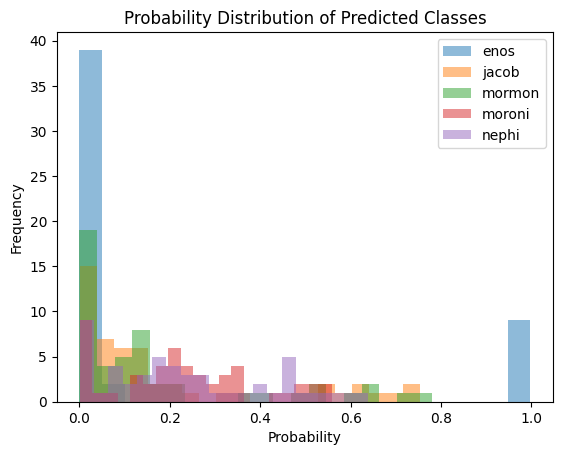

In [35]:
import numpy as np
import matplotlib.pyplot as plt

probabilities = rf_model.predict_proba(X_test_processed)
class_names = rf_model.classes_
for idx, class_name in enumerate(class_names):
    plt.hist(probabilities[:, idx], bins=20, label=class_name, alpha=0.5)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()
plt.title('Probability Distribution of Predicted Classes')
plt.show()

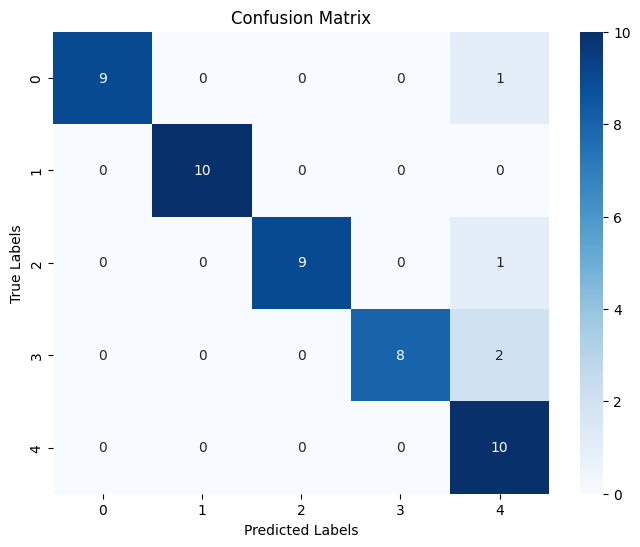

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(y_true, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

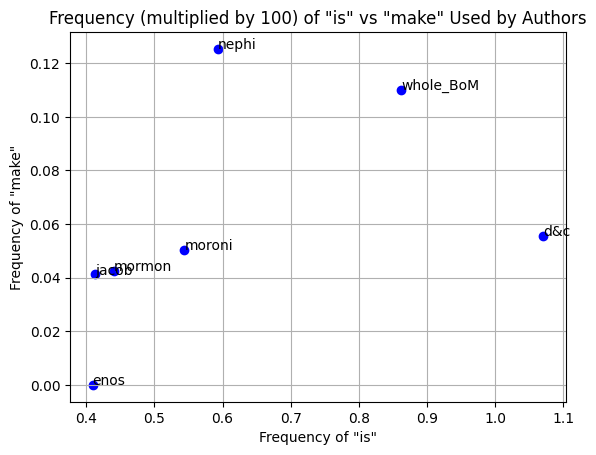

In [ ]:
import matplotlib.pyplot as plt
is_make_dict = {
    'whole_BoM': {"is": 0.86235447768, "make": 0.10998144063},
    'd&c': {"is": 1.07098046245, "make": 0.05556551353},
    'enos': {'is': 0.409165303, 'make': 0},
    'jacob': {'is': 0.412328626, 'make': 0.041232863},
    'mormon': {'is': 0.440728254, 'make': 0.042616318},
    'moroni': {'is': 0.543928533, 'make': 0.05043046},
    'nephi': {'is': 0.593337902, 'make': 0.125353078},
}
authors = list(is_make_dict.keys())

is_frequency = [is_make_dict[author]["is"] for author in authors]
make_frequency = [is_make_dict[author]["make"] for author in authors]

plt.scatter(is_frequency, make_frequency, color='blue')

plt.xlabel('Frequency of "is"')
plt.ylabel('Frequency of "make"')
plt.title('Frequency (multiplied by 100) of "is" vs "make" Used by Authors')

for i, author in enumerate(authors):
    plt.annotate(author, (is_frequency[i], make_frequency[i]))

plt.grid(True)
plt.show()

{'moroni': {'the': 6.829725154, 'of': 4.36223479}, 'mormon': {'the': 6.483074848, 'of': 3.997842212}, 'nephi': {'the': 7.265464391, 'of': 4.363958483}, 'enos': {'the': 5.237315876, 'of': 3.436988543}, 'jacob': {'the': 7.411607051, 'of': 4.092361612}, 'whole_BoM': {'the': 6.71972262707, 'of': 4.1190019328}, 'd&c': {'the': 6.69833303459, 'of': 3.67897472665}}


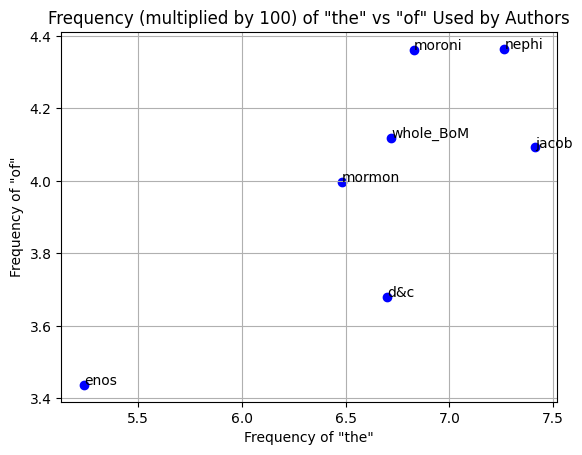

In [ ]:
the_of_dict = {
  "moroni": {
    "the": 6.829725154,
    "of": 4.36223479
  },
  "mormon": {
    "the": 6.483074848,
    "of": 3.997842212
  },
  "nephi": {
    "the": 7.265464391,
    "of": 4.363958483
  },
  "enos": {
    "the": 5.237315876,
    "of": 3.436988543
  },
  "jacob": {
    "the": 7.411607051,
    "of": 4.092361612
  },
  "whole_BoM": {
    "the": 6.71972262707,
    "of": 4.1190019328
  },
  "d&c": {
    "the": 6.69833303459,
    "of": 3.67897472665
  }
}
authors = list(the_of_dict.keys())
print(the_of_dict)
the_frequency = [the_of_dict[author]["the"] for author in authors]
of_frequency = [the_of_dict[author]["of"] for author in authors]

plt.scatter(the_frequency, of_frequency, color='blue')

plt.xlabel('Frequency of "the"')
plt.ylabel('Frequency of "of"')
plt.title('Frequency (multiplied by 100) of "the" vs "of" Used by Authors')

for i, author in enumerate(authors):
    plt.annotate(author, (the_frequency[i], of_frequency[i]))

plt.grid(True)
plt.show()

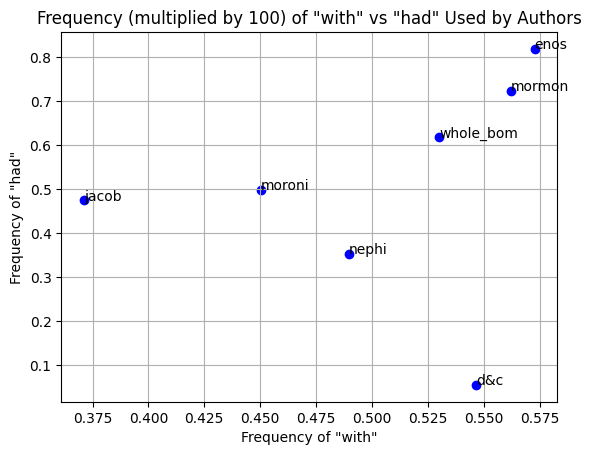

In [ ]:
with_had_dict = {
  "moroni": {
    "with": 0.450271964,
    "had": 0.497100249
  },
  "mormon": {
    "with": 0.562103844,
    "had": 0.723398517
  },
  "nephi": {
    "with": 0.489712691,
    "had": 0.352659992
  },
  "enos": {
    "with": 0.572831424,
    "had": 0.818330606
  },
  "jacob": {
    "with": 0.371095763,
    "had": 0.47417792
  },
  "whole_bom": {
    "with": 0.53021009181,
    "had": 0.61758815572
  },
  "d&c": {
    "with": 0.54669295572,
    "had": 0.05466929557
  }
}

authors = list(with_had_dict.keys())
with_frequency = [with_had_dict[author]["with"] for author in authors]
had_frequency = [with_had_dict[author]["had"] for author in authors]

plt.scatter(with_frequency, had_frequency, color='blue')

plt.xlabel('Frequency of "with"')
plt.ylabel('Frequency of "had"')
plt.title('Frequency (multiplied by 100) of "with" vs "had" Used by Authors')

for i, author in enumerate(authors):
    plt.annotate(author, (with_frequency[i], had_frequency[i]))

plt.grid(True)
plt.show()

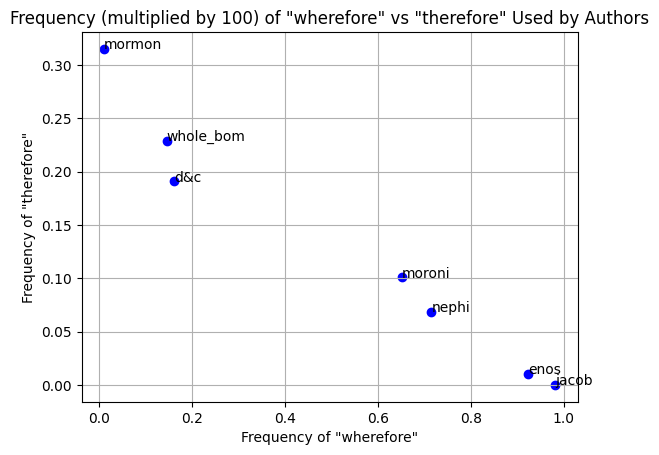

In [38]:
wherefore_therefore_dict = {
  "moroni": {
    "wherefore": 0.650759219,
    "therefore": 0.10086092
  },
  "mormon": {
    "wherefore": 0.01054994,
    "therefore": 0.315037087
  },
  "nephi": {
    "wherefore": 0.714589795,
    "therefore": 0.068526349
  },
  "enos": {
    "wherefore": 0.923076923,
    "therefore": 0.010308216
  },
  "jacob": {
    "wherefore": 0.980946991,
    "therefore": 0
  },
  "whole_bom": {
    "wherefore": 0.14504758609,
    "therefore": 0.22858101519
  },
  "d&c": {
    "wherefore": 0.16131923283,
    "therefore": 0.19089442552
  }
}
authors = list(wherefore_therefore_dict.keys())

wherefore_frequency = [wherefore_therefore_dict[author]['wherefore'] for author in authors]
therefore_frequency = [wherefore_therefore_dict[author]['therefore'] for author in authors]

plt.scatter(wherefore_frequency, therefore_frequency, color='blue')

plt.xlabel('Frequency of "wherefore"')
plt.ylabel('Frequency of "therefore"')
plt.title('Frequency (multiplied by 100) of "wherefore" vs "therefore" Used by Authors')

for i, author in enumerate(authors):
    plt.annotate(author, (wherefore_frequency[i], therefore_frequency[i]))

plt.grid(True)
plt.show()

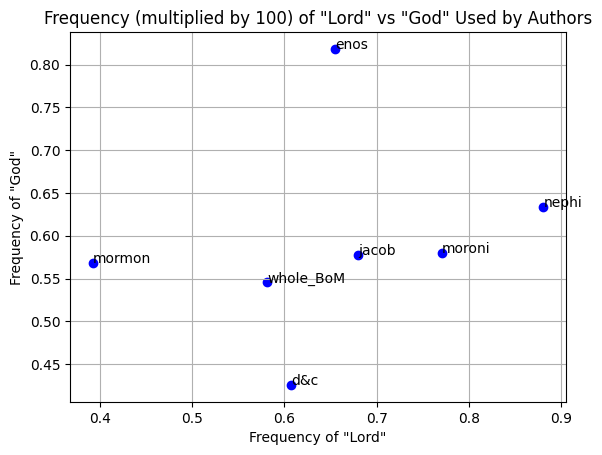

In [ ]:
word_frequencies = {
    'Lord': {
        'moroni': 0.770865603,
        'mormon': 0.392178018,
        'nephi': 0.880814294,
        'enos': 0.654664484,
        'jacob': 0.680342233,
        'whole_BoM': 0.58158839339,
        'd&c': 0.60763577702
    },
    'God': {
        'moroni': 0.57995029,
        'mormon': 0.568037761,
        'nephi': 0.633450887,
        'enos': 0.818330606,
        'jacob': 0.577260076,
        'whole_BoM': 0.54558863106,
        'd&c': 0.42570353109
    }
}

authors = list(word_frequencies['Lord'].keys())

lord_frequency = [word_frequencies['Lord'][author] for author in authors]
god_frequency = [word_frequencies['God'][author] for author in authors]

plt.scatter(lord_frequency, god_frequency, color='blue')

plt.xlabel('Frequency of "Lord"')
plt.ylabel('Frequency of "God"')
plt.title('Frequency (multiplied by 100) of "Lord" vs "God" Used by Authors')

for i, author in enumerate(authors):
    plt.annotate(author, (lord_frequency[i], god_frequency[i]))

# Show plot
plt.grid(True)
plt.show()

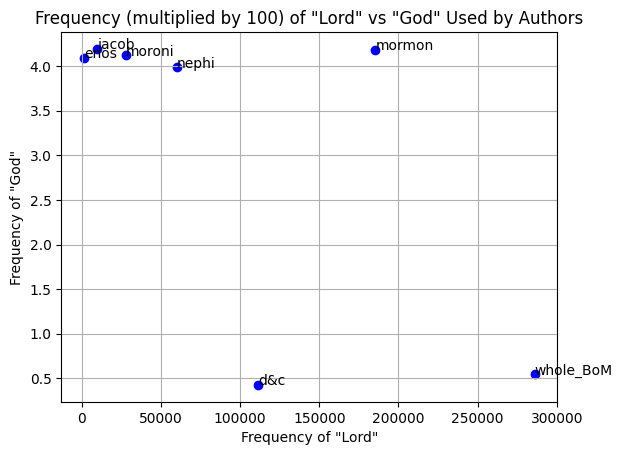

In [ ]:
word_counts = {
    'Total Word Count': {
        'moroni': 27761,
        'mormon': 185375,
        'nephi': 59831,
        'enos': 1222,
        'jacob': 9701,
        'whole_BoM': 286113,
        'd&c': 111580
    },
    'Average': {
        'moroni': 4.120600843,
        'mormon': 4.181270398,
        'nephi': 3.986127593,
        'enos': 4.093289689,
        'jacob': 4.193794454,
        'whole_BoM': 0.54558863106,
        'd&c': 0.42570353109
    }
}

authors = list(word_counts['Average'].keys())

total_word_count = [word_counts['Total Word Count'][author] for author in authors]
average = [word_counts['Average'][author] for author in authors]

plt.scatter(total_word_count, average, color='blue')

plt.xlabel('Total Word Count')
plt.ylabel('Average Letter Per Word')
plt.title('Frequency (multiplied by 100) of "Lord" vs "God" Used by Authors')

for i, author in enumerate(authors):
    plt.annotate(author, (total_word_count[i], average[i]))

plt.grid(True)
plt.show()

In [39]:
test_folder_path = "authors_csv"
desired_authors = ["nephi", "jacob", "moroni", "mormon", "enos"]
df = create_complete_data(test_folder_path, authors_to_include=desired_authors)
print(df.columns)

Index(['Author', 'abundance_FC', 'abundance_WC', 'according_FC',
       'according_WC', 'again_FC', 'again_WC', 'all_FC', 'all_WC', 'also_FC',
       ...
       'w_percentage_use', 'x_percentage_use', 'y_percentage_use',
       'z_percentage_use', 'Ã¢_percentage_use', 'Function_Word_Use',
       'Total_Word_Count', 'Total_Function_Word_Count', 'AVG_Letter_Per_Word',
       'AVG_Word_Per_Verse'],
      dtype='object', length=321)


In [55]:
df.head(5)

Author  abundance_FC  abundance_WC  according_FC  according_WC  again_FC  \
0  moroni           0.0           0.0      0.000000       0.00000  0.000000   
1  mormon           0.0           0.0      0.094653       0.05172  0.047327   
2   nephi           0.0           0.0      0.000000       0.00000  0.185548   
3    enos           0.0           0.0      0.000000       0.00000  0.000000   
4   jacob           0.0           0.0      0.000000       0.00000  0.000000   

   again_WC    all_FC    all_WC   also_FC  ...  w_percentage_use  \
0  0.000000  2.409921  1.237113  0.401654  ...          0.014365   
1  0.025860  0.662574  0.362038  0.473267  ...          0.026556   
2  0.099701  0.371095  0.199402  0.742191  ...          0.012367   
3  0.000000  0.000000  0.000000  0.000000  ...          0.000000   
4  0.000000  0.000000  0.000000  0.000000  ...          0.011429   

   x_percentage_use  y_percentage_use  z_percentage_use  Ã¢_percentage_use  \
0          0.000927          0.017609          0.000927           0.000463   
1          0.000981          0.022815          0.000613           0.000245   
2          0.001514          0.017920          0.000757           0.000757   
3          0.000000          0.000000          0.000000           0.000000   
4          0.000000          0.005714          0.000000           0.000000   

   Function_Word_Use  Total_Word_Count  Total_Function_Word_Count  \
0           0.513342               485                 248.970806   
1           0.546411              3867                2112.970561   
2           0.537333              1003                 538.944977   
3           0.000000                 0                   0.000000   
4           0.532226                43                  22.885714   

   AVG_Letter_Per_Word  AVG_Word_Per_Verse  
0             4.449485           34.642857  
1             4.216447           40.302083  
2             3.950150           30.424242  
3             0.000000            0.000000  
4             4.069767            8.600000  

[5 rows x 321 columns]

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
import numpy as np

In [215]:
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_author = encoder.fit_transform(df[['Author']])
encoded_author_df = pd.DataFrame(encoded_author, columns=encoder.get_feature_names_out(['Author']))

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
minMaxScaler = MinMaxScaler()

column_scores = {}
for i in numeric_columns:
    if i == 'Author':
        continue

    target_variable = i
    features = df.drop(columns=[target_variable])
    target = df[target_variable]

    features = pd.concat([features.drop(columns=['Author']), encoded_author_df], axis=1)

    features_scaled = pd.DataFrame(minMaxScaler.fit_transform(features), columns=features.columns)

    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.005, random_state=42)

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    n = X_test.shape[0]  
    p = X_test.shape[1]  
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    column_scores[i] = {
        "Mean Squared Error": mse,
        "R-squared": r2,
        "Adjusted R-squared": adjusted_r2,
        "Mean Absolute Error": mae,
        "Mean Absolute Percentage Error": mape
    }

# Print the results
for column, scores in column_scores.items():
    print(f"{column}: {scores}")

c:\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


abundance_FC: {'Mean Squared Error': 0.0006936246103244685, 'R-squared': 0.8114734794668557, 'Adjusted R-squared': 1.0833219889856307, 'Mean Absolute Error': 0.0035716762999484807, 'Mean Absolute Percentage Error': 1204671264849.9275}
abundance_WC: {'Mean Squared Error': 0.0002724805591561121, 'R-squared': 0.7862404668891543, 'Adjusted R-squared': 1.0944740793659542, 'Mean Absolute Error': 0.0022178909765645325, 'Mean Absolute Percentage Error': 676545567129.608}
according_FC: {'Mean Squared Error': 0.04123266938575875, 'R-squared': 0.8939859714942093, 'Adjusted R-squared': 1.0468544143842557, 'Mean Absolute Error': 0.06089829742497309, 'Mean Absolute Percentage Error': 50125272975933.48}
according_WC: {'Mean Squared Error': 0.013047931807203992, 'R-squared': 0.8931808774116494, 'Adjusted R-squared': 1.047210237215387, 'Mean Absolute Error': 0.03033287556156103, 'Mean Absolute Percentage Error': 28233499525775.39}
again_FC: {'Mean Squared Error': 0.00677970928089527, 'R-squared': 0.971

In [217]:
import pandas as pd

r_squared_values = pd.DataFrame([
    {'R-squared': metrics['R-squared']} 
    for metrics in column_scores.values() 
    if metrics['R-squared'] >= 0
])

summary = r_squared_values.describe()

# Count values below 0 before clipping
values_below_zero = (r_squared_values < 0).sum().sum()

# Additional statistics for outliers
z_scores = (r_squared_values - r_squared_values.mean()) / r_squared_values.std()
outliers = r_squared_values[abs(z_scores) > 3].dropna()

# Check for outliers and handle separately if necessary
if not outliers.empty:
    outliers_list = outliers['R-squared'].tolist()
    outliers_summary = pd.DataFrame({'outliers': outliers_list})
else:
    outliers_summary = pd.DataFrame({'outliers': [None]})

# Clip non-numeric values from the summary DataFrame
numeric_summary = numeric_summary.clip(lower=0)
numeric_summary = summary.select_dtypes(include=[float, int])  # Only select numeric columns

# Print the numeric summary
# print("Numeric Summary:")
# print(numeric_summary)

# # Print outliers summary
# print("\nOutliers Summary:")
# print(outliers_summary)

# # Print count of values below 0
# print(f"\nCount of values below 0: {values_below_zero}")

print("Summary statistics:")
print(summary)

Summary statistics:
        R-squared
count  314.000000
mean     0.856871
std      0.240426
min      0.000000
25%      0.871929
50%      0.957118
75%      0.978412
max      0.998983


In [202]:

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
minMaxScaler = MinMaxScaler()

no_auth_column_scores = {}
for i in numeric_columns:
    if i == 'Author':
        continue

    target_variable = i
    features = df.drop(columns=[target_variable, "Author"])
    target = df[target_variable]

    features_scaled = pd.DataFrame(minMaxScaler.fit_transform(features), columns=features.columns)

    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.005, random_state=42)

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    n = X_test.shape[0]  
    p = X_test.shape[1]  
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    no_auth_column_scores[i] = {
        "Mean Squared Error": mse,
        "R-squared": r2,
        "Adjusted R-squared": adjusted_r2,
        "Mean Absolute Error": mae,
        "Mean Absolute Percentage Error": mape
    }

# Print the results
for column, scores in no_auth_column_scores.items():
    print(f"{column}: {scores}")



ValueError: Cannot describe a DataFrame without columns

In [214]:
# for column, scores in no_auth_column_scores.items():
#     print(f"{column}: {scores}")

r_squared_values = pd.DataFrame([
    {'R-squared': metrics['R-squared']} 
    for metrics in no_auth_column_scores.values() 
    if metrics['R-squared'] >= 0
])

summary = r_squared_values.describe()

print(summary)



        R-squared
count  314.000000
mean     0.856606
std      0.240547
min      0.000000
25%      0.871929
50%      0.957118
75%      0.978412
max      0.998983


In [54]:
print(column_scores["lord_WC"])

{'Mean Squared Error': 0.014697925205285185, 'R-squared': 0.9735846565297795}


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dropout, Dense
#from tensorflow.keras.layers.experimental import preprocessing
import tensorflow.keras.preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score,mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.optimizers import Adam

In [171]:
def create_model(X_train, num_authors):
  features_in_data = X_train.shape[1]
  model = Sequential()
  model.add(Dense(features_in_data, input_dim=features_in_data, activation='relu'))
  model.add(Dropout(0.2))
  #model.add(Dense(10, activation='relu'))
  model.add(Dense(512, activation='relu'))
  # model.add(Dense(64, activation='relu'))
  # model.add(Dense(64, activation='relu'))
  # model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  # model.add(Dense(526, activation = 'relu'))
  # #model.add(Dropout(0.2))
  model.add(Dense(num_authors, activation = 'softmax'))
  #custom_learning_rate = 0.001
  custom_learning_rate = 0.01
  optimizer = Adam(learning_rate=custom_learning_rate)
  model.compile(loss="categorical_crossentropy",optimizer=optimizer, metrics = ['accuracy'])
  return model

In [172]:
test_folder_path = "authors_csv"
desired_authors = ["nephi", "jacob", "moroni", "mormon", "enos"]
df = create_complete_data(test_folder_path, authors_to_include=desired_authors)


features = df.drop(columns=['Author'])
target = df['Author']
minMaxScaler = MinMaxScaler()
features_scaled = pd.DataFrame(minMaxScaler.fit_transform(features), columns=features.columns)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.20, random_state=42)


5      moroni
116    mormon
45     moroni
16     mormon
462     nephi
        ...  
106    mormon
270    moroni
348      enos
435    moroni
102     nephi
Name: Author, Length: 350, dtype: object
361    mormon
73       enos
374     jacob
155    moroni
104     jacob
        ...  
266    mormon
23       enos
222     nephi
261    mormon
426    mormon
Name: Author, Length: 150, dtype: object


In [182]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
num_authors = len(label_encoder.classes_)

model = create_model(X_train, num_authors)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])


early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
history = model.fit(X_train, y_train_encoded, epochs=1000, validation_split=0.30, batch_size= 20, callbacks=[early_stop], shuffle=True)
hist = pd.DataFrame(history.history)

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2531 - loss: 1.5293 - val_accuracy: 0.5566 - val_loss: 1.3640
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4901 - loss: 1.3859 - val_accuracy: 0.7075 - val_loss: 1.2198
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6103 - loss: 1.2230 - val_accuracy: 0.7830 - val_loss: 0.9770
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7662 - loss: 0.8949 - val_accuracy: 0.7358 - val_loss: 0.8417
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8046 - loss: 0.7399 - val_accuracy: 0.8019 - val_loss: 0.6204
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8864 - loss: 0.4663 - val_accuracy: 0.8396 - val_loss: 0.4814
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8904 - loss: 0.3209 - val_accuracy: 0.8396 - val_loss: 0.4376
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8994 - loss: 0.2636 - val_accuracy: 0

In [183]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
class_names = label_encoder.classes_

label_to_name = dict(zip(range(len(class_names)), class_names))

# Print the mapping dictionary
print("Label to Name Mapping:")
print(label_to_name)


y_pred = model.predict(X_test)


predicted_labels = label_encoder.inverse_transform(y_pred.argmax(axis=1))

# Print predicted labels
print("Predicted labels:", predicted_labels)

# Step 4: Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)

# Step 5: Calculate precision, recall, F1-score, support
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predicted_labels, average='weighted')

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)

Label to Name Mapping:
{0: 'enos', 1: 'jacob', 2: 'mormon', 3: 'moroni', 4: 'nephi'}
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Predicted labels: ['mormon' 'enos' 'jacob' 'moroni' 'jacob' 'jacob' 'nephi' 'jacob' 'enos'
 'moroni' 'jacob' 'moroni' 'mormon' 'jacob' 'mormon' 'enos' 'moroni'
 'moroni' 'mormon' 'enos' 'mormon' 'mormon' 'moroni' 'mormon' 'mormon'
 'mormon' 'nephi' 'mormon' 'mormon' 'jacob' 'jacob' 'mormon' 'jacob'
 'enos' 'mormon' 'enos' 'moroni' 'nephi' 'jacob' 'enos' 'jacob' 'enos'
 'moroni' 'nephi' 'enos' 'nephi' 'nephi' 'mormon' 'moroni' 'nephi' 'nephi'
 'nephi' 'mormon' 'moroni' 'enos' 'nephi' 'enos' 'enos' 'jacob' 'enos'
 'jacob' 'nephi' 'enos' 'enos' 'jacob' 'jacob' 'mormon' 'mormon' 'enos'
 'mormon' 'nephi' 'mormon' 'nephi' 'moroni' 'nephi' 'nephi' 'enos'
 'moroni' 'moroni' 'moroni' 'jacob' 'nephi' 'nephi' 'nephi' 'mormon'
 'nephi' 'moroni' 'jacob' 'nephi' 'enos' 'mormon' 'nephi' 'nephi' 'jacob'
 'mormon' 'nephi' 'mormon' 'nephi' 'enos' 'nephi' 'jacob' 'enos' 'jacob'
 'nep

In [184]:
# Assuming 'df' is your DataFrame containing features and target
X = df.drop(columns=['Author'])  # Features
y = df['Author']  # Target

# Initialize Stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=50, shuffle=True, random_state=42)

# Lists to store scores
accuracy_scores = []

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_authors = len(label_encoder.classes_)

# Define a function to create and compile your neural network model
def create_model(X_train, num_authors):
    features_in_data = X_train.shape[1]
    model = Sequential([
        Dense(features_in_data, input_dim=features_in_data, activation='relu'),
        Dense(48, activation='relu'),
        Dense(num_authors, activation='softmax')  # Adjust output layer based on number of authors
    ])
    custom_learning_rate = 0.0007
    optimizer = Adam(learning_rate=custom_learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    return model

# Perform cross-validation
for train_index, test_index in kfold.split(X, y_encoded):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y_encoded[train_index], y_encoded[test_index]
    
    # Create and compile the model
    model = create_model(X_train, num_authors)
    
    # Use early stopping to prevent overfitting
    early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val),
                        batch_size=20, callbacks=[early_stop], verbose=0)
    
    # Evaluate the model on the validation set
    y_pred = np.argmax(model.predict(X_val), axis=-1)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)

# Print cross-validation results
print("Cross-validation results:")
for i, score in enumerate(accuracy_scores):
    print(f"Fold {i+1}: Accuracy = {score}")

# Calculate and print average accuracy
avg_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy = {avg_accuracy}")

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

ZeroDivisionError: float division by zero

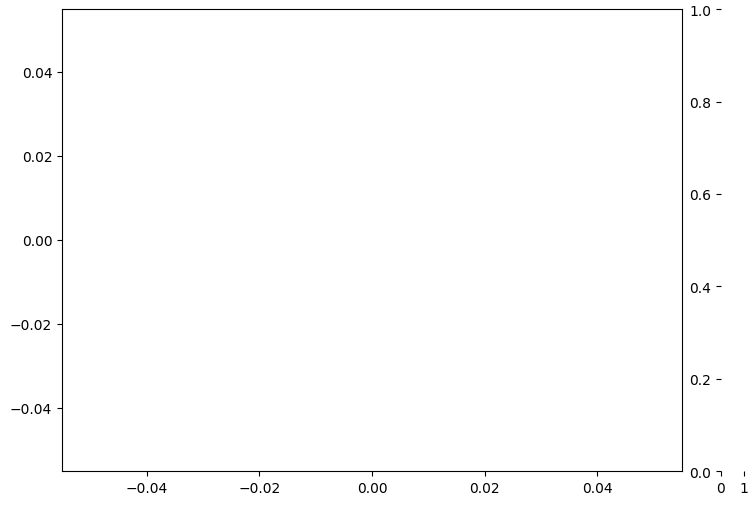

In [86]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

actual_values = []
predicted_values = []


plt.figure(figsize=(10, 6))

error = np.array(actual_values) - np.array(predicted_values)
cmap = ListedColormap(['red' if err > 0 else 'blue' for err in error])  

scatter = plt.scatter(actual_values, predicted_values, c=error, cmap=cmap, alpha=0.6)

cb = plt.colorbar(scatter)
cb.set_label('Actual - Predicted Error')

legend_labels = ['Positive Error', 'Negative Error']
legend_markers = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in ['red', 'blue']]
plt.legend(legend_markers, legend_labels, loc='upper left')

plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='gray', linestyle='--')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

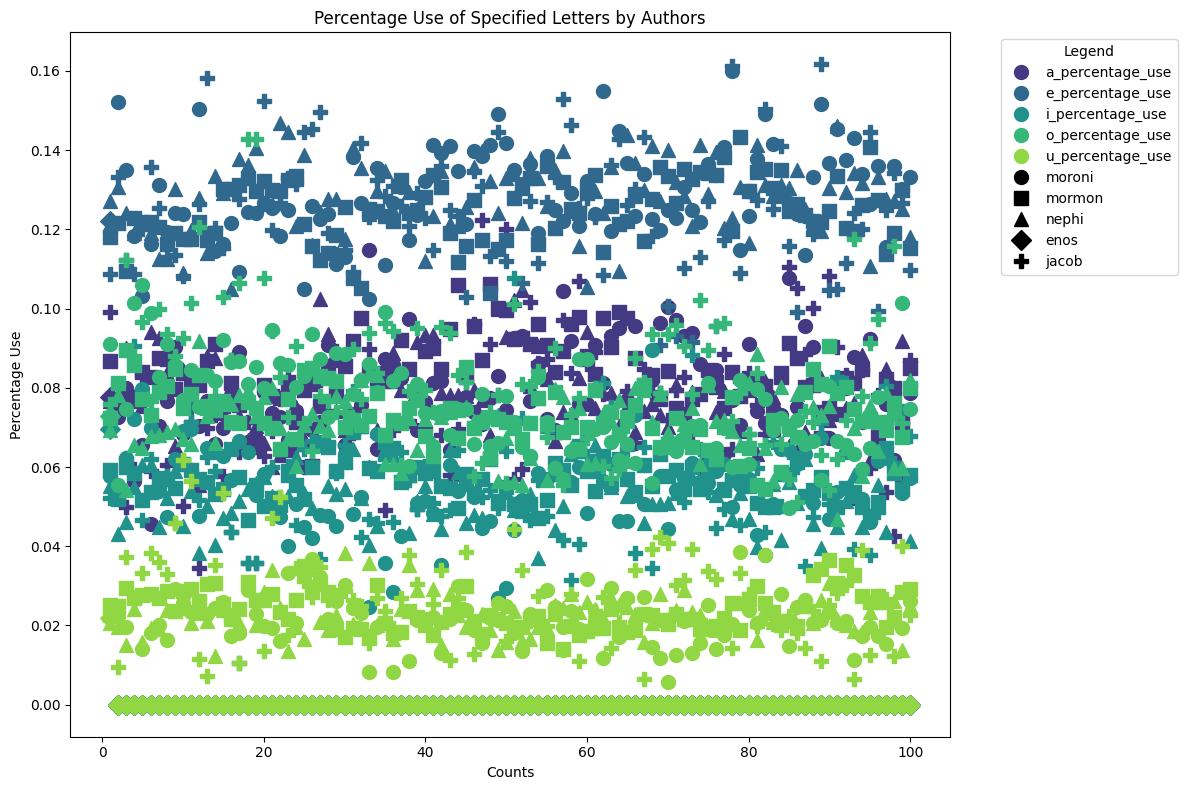

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

letters_to_include = ['a', 'e', 'i', 'o', 'u']

# Filter columns to include only percentage columns for specified letters
percentage_columns = [col for col in df.columns if col[0] in letters_to_include and col.endswith('_percentage_use')]

# Melt the DataFrame
df_percentage = df.melt(id_vars='Author', value_vars=percentage_columns, var_name='Letter', value_name='Percentage Use')

# Count occurrences of each author-letter combination
df_percentage['Counts'] = df_percentage.groupby(['Author', 'Letter']).cumcount() + 1

# Initialize a figure and axis
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Define unique colors for each letter
letters = df_percentage['Letter'].unique()
colors = sns.color_palette('viridis', n_colors=len(letters))
letter_to_color = {letter: color for letter, color in zip(letters, colors)}

# Define unique markers for each author
authors = df_percentage['Author'].unique()
markers = ['o', 's', '^', 'D', 'P'][:len(authors)]  # Ensure enough markers for all authors
author_to_marker = {author: marker for author, marker in zip(authors, markers)}

# Plot each point
for idx, row in df_percentage.iterrows():
    author = row['Author']
    letter = row['Letter']
    percentage_use = row['Percentage Use']
    count = row['Counts']
    color = letter_to_color[letter]
    marker = author_to_marker[author]
    ax.scatter(count, percentage_use, color=color, marker=marker, s=100, label=letter)

# Set labels and title
plt.title('Percentage Use of Specified Letters by Authors')
plt.xlabel('Counts')
plt.ylabel('Percentage Use')

# Customize legend for authors and letters
handles = []
for letter, color in letter_to_color.items():
    handles.append(plt.Line2D([], [], color=color, marker='o', linestyle='None', markersize=10, label=letter))
for author, marker in author_to_marker.items():
    handles.append(plt.Line2D([], [], color='black', marker=marker, linestyle='None', markersize=10, label=author))
plt.legend(handles=handles, title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


In [2]:
letters_to_include = ['a', 'e', 'i', 'o', 'u']

plt.figure(figsize=(12, 8))
ax = plt.gca()

authors = df['Author'].unique()
colors = ['blue', 'green', 'red', 'purple', 'orange']
line_styles = ['-', '--', '-.', ':', '-']

for i, author in enumerate(authors):
    for j, letter in enumerate(letters_to_include):
        column_name = f"{letter}_percentage_use"
        style = line_styles[j]
        color = colors[i]
        author_letter_data = df[df['Author'] == author]
        ax.plot(author_letter_data.index, author_letter_data[column_name], linestyle=style, color=color, label=f"{author}-{letter}")

plt.title('Percentage Use of Specified Letters by Authors')
plt.xlabel('Index')
plt.ylabel('Percentage Use')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Author-Letter', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

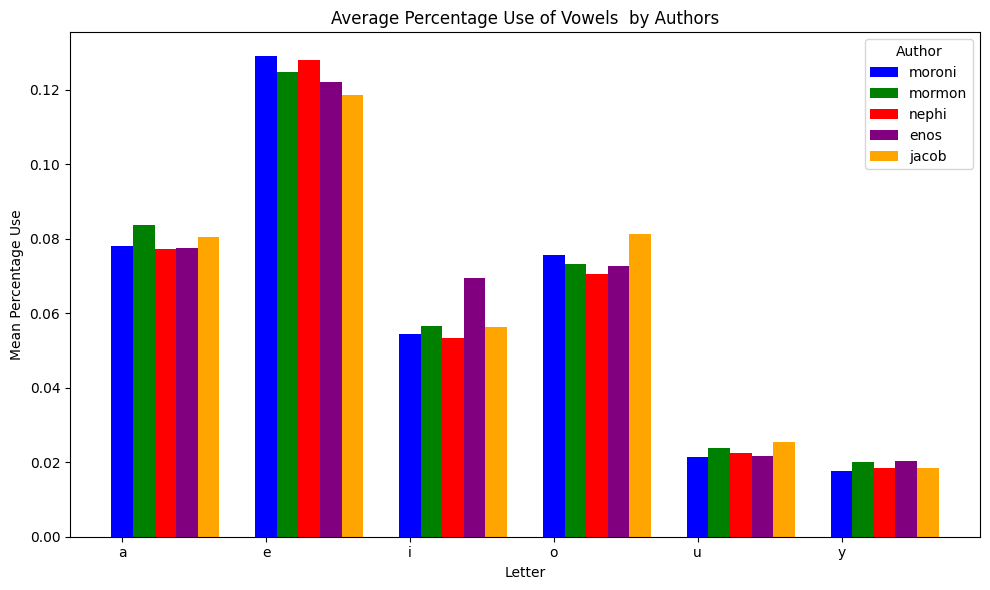

In [37]:
letters_to_include = ['a', 'e', 'i', 'o', 'u', 'y']

plt.figure(figsize=(10, 6))
ax = plt.gca()

authors = df['Author'].unique()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'black', 'brown', 'pink']

bar_width = 0.15
for i, author in enumerate(authors):
    x_positions = [x + i * bar_width for x in range(len(letters_to_include))]
    for j, letter in enumerate(letters_to_include):
        column_name = f"{letter}_percentage_use"
        mean_percentage_use = df[df['Author'] == author][column_name]
        mean_percentage_use = mean_percentage_use[mean_percentage_use != 0].mean() if (mean_percentage_use != 0).any() else 0
        ax.bar(x_positions[j], mean_percentage_use, width=bar_width, color=colors[i], label=author if j == 0 else "", align='center')

ax.set_xticks([x for x in range(len(letters_to_include))])
ax.set_xticklabels(letters_to_include)
plt.xlabel('Letter')

plt.title('Average Percentage Use of Vowels  by Authors')
plt.ylabel('Mean Percentage Use')

plt.legend(title='Author')

plt.tight_layout()
plt.show()